In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
sys.path.insert(0, 'code/')

### Shortcuts:

* [Location based attention](#Location-based-attention)
* [Content based attention (dot)](#Content-based-attention-(dot))
* [Pointer networks](#Pointer-networks)
* [Content based attention (general)](#Content-based-attention-(general))
* [Content based attention (concatenation)](#Content-based-attention---concatenation)

---

## Location based attention

In [2]:
import location_based_attention as attn_local

In [3]:
accuracy_before = []
for _ in range(100):
    accuracy_before.append(attn_local.test()[-2].item())
    
np.mean(accuracy_before)

1.02

In [4]:
for _ in range(3):
    attn_local.train()

Loss at iteration 0: 2.30559754
Accuracy in last 100 iterations: 2/10
Loss at iteration 100: 2.30545354
Accuracy in last 100 iterations: 112/1000
Loss at iteration 200: 2.24659204
Accuracy in last 100 iterations: 137/1000
Loss at iteration 300: 2.21842623
Accuracy in last 100 iterations: 169/1000
Loss at iteration 400: 2.20180821
Accuracy in last 100 iterations: 183/1000
Loss at iteration 500: 1.90386105
Accuracy in last 100 iterations: 214/1000
Loss at iteration 600: 1.78373599
Accuracy in last 100 iterations: 246/1000
Loss at iteration 700: 1.96263576
Accuracy in last 100 iterations: 274/1000
Loss at iteration 800: 1.93740916
Accuracy in last 100 iterations: 289/1000
Loss at iteration 900: 2.07588053
Accuracy in last 100 iterations: 299/1000
Loss at iteration 1000: 1.78730392
Accuracy in last 100 iterations: 332/1000
Loss at iteration 1100: 1.80938125
Accuracy in last 100 iterations: 356/1000
Loss at iteration 1200: 1.73751223
Accuracy in last 100 iterations: 339/1000
Loss at iterati

Loss at iteration 700: 0.41740829
Accuracy in last 100 iterations: 851/1000
Loss at iteration 800: 0.96235526
Accuracy in last 100 iterations: 828/1000
Loss at iteration 900: 0.49132332
Accuracy in last 100 iterations: 812/1000
Loss at iteration 1000: 0.30895481
Accuracy in last 100 iterations: 822/1000
Loss at iteration 1100: 0.47231206
Accuracy in last 100 iterations: 834/1000
Loss at iteration 1200: 0.32228851
Accuracy in last 100 iterations: 861/1000
Loss at iteration 1300: 0.32089457
Accuracy in last 100 iterations: 831/1000
Loss at iteration 1400: 0.49965572
Accuracy in last 100 iterations: 826/1000
Loss at iteration 1500: 0.28005728
Accuracy in last 100 iterations: 850/1000
Loss at iteration 1600: 0.47767496
Accuracy in last 100 iterations: 864/1000
Loss at iteration 1700: 0.25161570
Accuracy in last 100 iterations: 857/1000
Loss at iteration 1800: 0.34356087
Accuracy in last 100 iterations: 837/1000
Loss at iteration 1900: 0.48398370
Accuracy in last 100 iterations: 854/1000
Lo

Loss at iteration 1400: 0.33859554
Accuracy in last 100 iterations: 911/1000
Loss at iteration 1500: 0.10567121
Accuracy in last 100 iterations: 911/1000
Loss at iteration 1600: 0.27578241
Accuracy in last 100 iterations: 899/1000
Loss at iteration 1700: 0.12059097
Accuracy in last 100 iterations: 924/1000
Loss at iteration 1800: 0.22412291
Accuracy in last 100 iterations: 901/1000
Loss at iteration 1900: 0.74952769
Accuracy in last 100 iterations: 904/1000
Loss at iteration 2000: 0.38149667
Accuracy in last 100 iterations: 903/1000
Loss at iteration 2100: 0.30613551
Accuracy in last 100 iterations: 904/1000
Loss at iteration 2200: 0.25475416
Accuracy in last 100 iterations: 916/1000
Loss at iteration 2300: 0.36291188
Accuracy in last 100 iterations: 921/1000
Loss at iteration 2400: 0.25762624
Accuracy in last 100 iterations: 902/1000
Loss at iteration 2500: 0.51584321
Accuracy in last 100 iterations: 918/1000
Loss at iteration 2600: 0.24641418
Accuracy in last 100 iterations: 906/1000

In [5]:
accuracy_after = []
for _ in range(1000):
    accuracy_after.append(attn_local.test()[-2].item())
    
np.mean(accuracy_after)

9.27

In [6]:
random_sequence, correct_sequence, softmax_input, accurate, attentions = attn_local.test()

In [7]:
softmax_input.max(1)[1], correct_sequence, accurate

(tensor([2, 8, 0, 3, 4, 1, 5, 6, 7, 9]),
 tensor([2, 8, 0, 3, 4, 1, 5, 6, 7, 9]),
 tensor(10))

In [8]:
np.array([a[0,0].detach().numpy() for a in attentions])

array([[0.02500517, 0.12677486, 0.13308652, 0.08586222, 0.10319298,
        0.14779598, 0.09860509, 0.0859079 , 0.10656961, 0.08719966],
       [0.01423313, 0.11882726, 0.11295556, 0.10472406, 0.11599562,
        0.13844173, 0.08856905, 0.11621656, 0.10641565, 0.08362138],
       [0.02127565, 0.05874003, 0.07832192, 0.13570651, 0.15106952,
        0.14978892, 0.1067994 , 0.10858371, 0.11416762, 0.07554669],
       [0.02618607, 0.08232325, 0.08272905, 0.12541908, 0.17987938,
        0.16198073, 0.10002308, 0.10356933, 0.08874743, 0.04914261],
       [0.01671478, 0.07781966, 0.10784865, 0.1304249 , 0.1699889 ,
        0.13715528, 0.09333012, 0.11139732, 0.11071782, 0.04460258],
       [0.03682594, 0.06414368, 0.08341841, 0.12646766, 0.17094119,
        0.16492839, 0.10167723, 0.09689867, 0.11545953, 0.03923926],
       [0.02557763, 0.09875353, 0.09843216, 0.10449509, 0.16217881,
        0.15319407, 0.12292464, 0.11429644, 0.07950535, 0.04064223],
       [0.02441961, 0.0956674 , 0.1041451

In [9]:
def min_max_normalization(x):
    return (x - x.min())/(x.max() - x.min())

np.array([min_max_normalization(a[0,0].detach().numpy()) for a in attentions])

attention_normalized = np.array([min_max_normalization(a[0,0].detach().numpy()) for a in attentions])

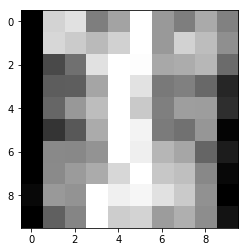

In [10]:
plt.imshow(attention_normalized, 'gray')

In [11]:
random_sequence

tensor([[2, 5, 0, 3, 4, 6, 7, 8, 1, 9]])

---

## Content based attention (dot)

In [12]:
import content_based_dot_attention as attn_dot

In [13]:
accuracy_before = []
for _ in range(100):
    accuracy_before.append(attn_dot.test()[-2].item())
    
np.mean(accuracy_before)

1.01

In [14]:
for _ in range(3):
    attn_dot.train()

Loss at iteration 0: 2.30426860
Accuracy in last 100 iterations: 1/10
Loss at iteration 100: 2.28844380
Accuracy in last 100 iterations: 100/1000
Loss at iteration 200: 2.31006098
Accuracy in last 100 iterations: 134/1000
Loss at iteration 300: 2.06813049
Accuracy in last 100 iterations: 142/1000
Loss at iteration 400: 2.04553890
Accuracy in last 100 iterations: 175/1000
Loss at iteration 500: 2.12632918
Accuracy in last 100 iterations: 177/1000
Loss at iteration 600: 1.99214339
Accuracy in last 100 iterations: 204/1000
Loss at iteration 700: 2.09486055
Accuracy in last 100 iterations: 236/1000
Loss at iteration 800: 2.04562330
Accuracy in last 100 iterations: 254/1000
Loss at iteration 900: 2.15844464
Accuracy in last 100 iterations: 241/1000
Loss at iteration 1000: 1.87164283
Accuracy in last 100 iterations: 266/1000
Loss at iteration 1100: 1.77767849
Accuracy in last 100 iterations: 292/1000
Loss at iteration 1200: 2.12895489
Accuracy in last 100 iterations: 285/1000
Loss at iterati

Loss at iteration 700: 0.52225518
Accuracy in last 100 iterations: 831/1000
Loss at iteration 800: 0.46359435
Accuracy in last 100 iterations: 815/1000
Loss at iteration 900: 0.66224509
Accuracy in last 100 iterations: 824/1000
Loss at iteration 1000: 0.47919297
Accuracy in last 100 iterations: 844/1000
Loss at iteration 1100: 0.57544416
Accuracy in last 100 iterations: 820/1000
Loss at iteration 1200: 0.45685250
Accuracy in last 100 iterations: 800/1000
Loss at iteration 1300: 0.57029414
Accuracy in last 100 iterations: 818/1000
Loss at iteration 1400: 0.65509033
Accuracy in last 100 iterations: 803/1000
Loss at iteration 1500: 0.52400881
Accuracy in last 100 iterations: 833/1000
Loss at iteration 1600: 0.50158513
Accuracy in last 100 iterations: 834/1000
Loss at iteration 1700: 0.42724234
Accuracy in last 100 iterations: 859/1000
Loss at iteration 1800: 0.43560082
Accuracy in last 100 iterations: 828/1000
Loss at iteration 1900: 0.53793609
Accuracy in last 100 iterations: 853/1000
Lo

Loss at iteration 1400: 0.19422288
Accuracy in last 100 iterations: 905/1000
Loss at iteration 1500: 0.25596395
Accuracy in last 100 iterations: 886/1000
Loss at iteration 1600: 0.57701194
Accuracy in last 100 iterations: 905/1000
Loss at iteration 1700: 0.44495326
Accuracy in last 100 iterations: 915/1000
Loss at iteration 1800: 0.18556948
Accuracy in last 100 iterations: 925/1000
Loss at iteration 1900: 0.23801985
Accuracy in last 100 iterations: 915/1000
Loss at iteration 2000: 0.13537665
Accuracy in last 100 iterations: 913/1000
Loss at iteration 2100: 0.12306385
Accuracy in last 100 iterations: 899/1000
Loss at iteration 2200: 0.23225126
Accuracy in last 100 iterations: 892/1000
Loss at iteration 2300: 0.42526332
Accuracy in last 100 iterations: 901/1000
Loss at iteration 2400: 0.10016946
Accuracy in last 100 iterations: 919/1000
Loss at iteration 2500: 0.20608358
Accuracy in last 100 iterations: 906/1000
Loss at iteration 2600: 0.21780267
Accuracy in last 100 iterations: 912/1000

In [15]:
accuracy_after = []
for _ in range(1000):
    accuracy_after.append(attn_dot.test()[-2].item())
    
np.mean(accuracy_after)

9.097

In [16]:
random_sequence, correct_sequence, softmax_input, accurate, attentions = attn_local.test()

In [17]:
softmax_input.max(1)[1], correct_sequence, accurate

(tensor([1, 0, 8, 9, 2, 3, 7, 5, 6, 4]),
 tensor([1, 0, 8, 9, 2, 3, 7, 5, 6, 4]),
 tensor(10))

In [18]:
np.array([a[0,0].detach().numpy() for a in attentions])

array([[0.02583587, 0.09620975, 0.125464  , 0.08053908, 0.10777347,
        0.13319768, 0.10848153, 0.11107256, 0.14066486, 0.07076123],
       [0.02584182, 0.08619056, 0.09662391, 0.08750036, 0.1608577 ,
        0.13818946, 0.11471014, 0.13490936, 0.12649107, 0.02868561],
       [0.05972865, 0.10340665, 0.07586919, 0.11349026, 0.16530794,
        0.11994054, 0.1142733 , 0.11866467, 0.09135054, 0.03796829],
       [0.04030048, 0.0639444 , 0.09281634, 0.15245914, 0.13917434,
        0.12763622, 0.10286935, 0.10457511, 0.08420879, 0.09201584],
       [0.03806725, 0.06188602, 0.09038958, 0.14604926, 0.14205602,
        0.13809843, 0.10190767, 0.10159109, 0.06856105, 0.11139359],
       [0.02625175, 0.09217142, 0.09091506, 0.13272944, 0.15680654,
        0.16077399, 0.11008523, 0.10267216, 0.07427777, 0.05331663],
       [0.02112081, 0.08698103, 0.09840474, 0.1160111 , 0.14992224,
        0.15542722, 0.10493094, 0.12336662, 0.08394917, 0.05988621],
       [0.01874015, 0.07773704, 0.0764928

In [19]:
def min_max_normalization(x):
    return (x - x.min())/(x.max() - x.min())

np.array([min_max_normalization(a[0,0].detach().numpy()) for a in attentions])

attention_normalized = np.array([min_max_normalization(a[0,0].detach().numpy()) for a in attentions])

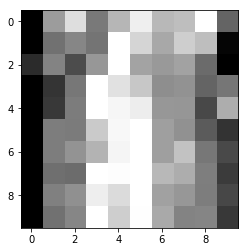

In [20]:
plt.imshow(attention_normalized, 'gray')

In [21]:
random_sequence

tensor([[1, 0, 4, 5, 9, 7, 8, 6, 2, 3]])

---

## Pointer networks

In [22]:
import pointer_network

In [23]:
accuracy_before = []
for _ in range(100):
    accuracy_before.append(pointer_network.test()[-2].item())
    
np.mean(accuracy_before)

1.02

In [24]:
for _ in range(3):
    pointer_network.train()

Loss at iteration 0: 2.30333447
Accuracy in last 100 iterations: 1/10
Loss at iteration 100: 2.30174279
Accuracy in last 100 iterations: 104/1000
Loss at iteration 200: 2.27741671
Accuracy in last 100 iterations: 129/1000
Loss at iteration 300: 2.31787348
Accuracy in last 100 iterations: 142/1000
Loss at iteration 400: 1.93306637
Accuracy in last 100 iterations: 188/1000
Loss at iteration 500: 2.12627888
Accuracy in last 100 iterations: 219/1000
Loss at iteration 600: 2.07406092
Accuracy in last 100 iterations: 231/1000
Loss at iteration 700: 1.94512343
Accuracy in last 100 iterations: 239/1000
Loss at iteration 800: 1.74219537
Accuracy in last 100 iterations: 256/1000
Loss at iteration 900: 2.06431174
Accuracy in last 100 iterations: 281/1000
Loss at iteration 1000: 1.84636652
Accuracy in last 100 iterations: 300/1000
Loss at iteration 1100: 1.82321358
Accuracy in last 100 iterations: 317/1000
Loss at iteration 1200: 1.53765678
Accuracy in last 100 iterations: 344/1000
Loss at iterati

Loss at iteration 700: 0.69423360
Accuracy in last 100 iterations: 779/1000
Loss at iteration 800: 0.44024819
Accuracy in last 100 iterations: 761/1000
Loss at iteration 900: 0.69708550
Accuracy in last 100 iterations: 771/1000
Loss at iteration 1000: 0.41075617
Accuracy in last 100 iterations: 774/1000
Loss at iteration 1100: 0.38236457
Accuracy in last 100 iterations: 783/1000
Loss at iteration 1200: 0.55658674
Accuracy in last 100 iterations: 785/1000
Loss at iteration 1300: 0.61730278
Accuracy in last 100 iterations: 790/1000
Loss at iteration 1400: 0.57004654
Accuracy in last 100 iterations: 824/1000
Loss at iteration 1500: 0.46400499
Accuracy in last 100 iterations: 806/1000
Loss at iteration 1600: 0.59595829
Accuracy in last 100 iterations: 786/1000
Loss at iteration 1700: 0.49912876
Accuracy in last 100 iterations: 795/1000
Loss at iteration 1800: 0.82773703
Accuracy in last 100 iterations: 781/1000
Loss at iteration 1900: 0.46161413
Accuracy in last 100 iterations: 816/1000
Lo

Loss at iteration 1400: 0.20649552
Accuracy in last 100 iterations: 907/1000
Loss at iteration 1500: 0.21002665
Accuracy in last 100 iterations: 901/1000
Loss at iteration 1600: 0.20861773
Accuracy in last 100 iterations: 897/1000
Loss at iteration 1700: 0.28529134
Accuracy in last 100 iterations: 911/1000
Loss at iteration 1800: 0.34874392
Accuracy in last 100 iterations: 897/1000
Loss at iteration 1900: 0.13836618
Accuracy in last 100 iterations: 897/1000
Loss at iteration 2000: 0.12529774
Accuracy in last 100 iterations: 899/1000
Loss at iteration 2100: 0.12930956
Accuracy in last 100 iterations: 907/1000
Loss at iteration 2200: 0.12383294
Accuracy in last 100 iterations: 918/1000
Loss at iteration 2300: 0.19011493
Accuracy in last 100 iterations: 920/1000
Loss at iteration 2400: 0.55007231
Accuracy in last 100 iterations: 909/1000
Loss at iteration 2500: 0.11470008
Accuracy in last 100 iterations: 916/1000
Loss at iteration 2600: 0.12319203
Accuracy in last 100 iterations: 920/1000

In [25]:
accuracy_after = []
for _ in range(1000):
    accuracy_after.append(pointer_network.test()[-2].item())
    
np.mean(accuracy_after)

9.278

In [38]:
random_sequence, correct_sequence, softmax_input, accurate, attentions = pointer_network.test()

In [39]:
softmax_input.max(1)[1], correct_sequence, accurate

(tensor([7, 6, 5, 9, 8, 4, 1, 3, 0, 2]),
 tensor([7, 6, 5, 9, 8, 4, 1, 3, 0, 2]),
 tensor(10))

In [40]:
np.array([a[0,0].detach().numpy() for a in attentions])

array([[0.10259458, 0.06929223, 0.09369805, 0.14922158, 0.12905785,
        0.09097019, 0.08032312, 0.08187154, 0.16698276, 0.03598804],
       [0.10259458, 0.06929226, 0.09369805, 0.14922152, 0.12905791,
        0.09097023, 0.0803231 , 0.08187155, 0.1669828 , 0.03598804],
       [0.10259459, 0.06929222, 0.09369807, 0.14922157, 0.12905791,
        0.09097017, 0.08032313, 0.08187155, 0.1669828 , 0.03598804],
       [0.1025946 , 0.06929226, 0.09369805, 0.14922157, 0.12905796,
        0.09097018, 0.08032311, 0.08187154, 0.16698274, 0.03598804],
       [0.10259462, 0.06929223, 0.09369803, 0.14922151, 0.12905791,
        0.09097017, 0.0803231 , 0.08187155, 0.16698273, 0.03598804],
       [0.10259458, 0.06929225, 0.09369806, 0.14922155, 0.12905793,
        0.09097021, 0.0803231 , 0.08187155, 0.16698278, 0.03598803],
       [0.10259461, 0.06929225, 0.09369807, 0.14922158, 0.12905791,
        0.09097021, 0.08032311, 0.08187154, 0.16698276, 0.03598804],
       [0.10259458, 0.06929225, 0.0936980

In [41]:
def min_max_normalization(x):
    return (x - x.min())/(x.max() - x.min())

np.array([min_max_normalization(a[0,0].detach().numpy()) for a in attentions])

attention_normalized = np.array([min_max_normalization(a[0,0].detach().numpy()) for a in attentions])

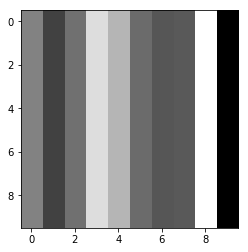

In [42]:
plt.imshow(attention_normalized, 'gray')

In [43]:
random_sequence

tensor([[8, 6, 9, 7, 5, 2, 1, 0, 4, 3]])

---

## Content based attention (general)

In [44]:
import content_based_general_attention as attn_general

In [45]:
accuracy_before = []
for _ in range(100):
    accuracy_before.append(attn_general.test()[-2].item())
    
np.mean(accuracy_before)

0.99

In [46]:
for _ in range(3):
    attn_general.train()

Loss at iteration 0: 2.30342245
Accuracy in last 100 iterations: 1/10
Loss at iteration 100: 2.26773119
Accuracy in last 100 iterations: 115/1000
Loss at iteration 200: 2.30444646
Accuracy in last 100 iterations: 136/1000
Loss at iteration 300: 2.19670057
Accuracy in last 100 iterations: 156/1000
Loss at iteration 400: 2.10812354
Accuracy in last 100 iterations: 176/1000
Loss at iteration 500: 2.12257886
Accuracy in last 100 iterations: 197/1000
Loss at iteration 600: 1.97918820
Accuracy in last 100 iterations: 219/1000
Loss at iteration 700: 2.03648329
Accuracy in last 100 iterations: 264/1000
Loss at iteration 800: 2.01891637
Accuracy in last 100 iterations: 272/1000
Loss at iteration 900: 1.73257983
Accuracy in last 100 iterations: 281/1000
Loss at iteration 1000: 1.96025348
Accuracy in last 100 iterations: 314/1000
Loss at iteration 1100: 1.78275323
Accuracy in last 100 iterations: 326/1000
Loss at iteration 1200: 1.73934615
Accuracy in last 100 iterations: 319/1000
Loss at iterati

Loss at iteration 700: 0.76284140
Accuracy in last 100 iterations: 813/1000
Loss at iteration 800: 0.47293895
Accuracy in last 100 iterations: 833/1000
Loss at iteration 900: 0.44528484
Accuracy in last 100 iterations: 837/1000
Loss at iteration 1000: 0.66426647
Accuracy in last 100 iterations: 851/1000
Loss at iteration 1100: 0.35119995
Accuracy in last 100 iterations: 817/1000
Loss at iteration 1200: 0.72006685
Accuracy in last 100 iterations: 848/1000
Loss at iteration 1300: 0.55954564
Accuracy in last 100 iterations: 842/1000
Loss at iteration 1400: 0.30809802
Accuracy in last 100 iterations: 815/1000
Loss at iteration 1500: 0.51825374
Accuracy in last 100 iterations: 837/1000
Loss at iteration 1600: 0.39874333
Accuracy in last 100 iterations: 832/1000
Loss at iteration 1700: 0.47264877
Accuracy in last 100 iterations: 831/1000
Loss at iteration 1800: 0.31630525
Accuracy in last 100 iterations: 833/1000
Loss at iteration 1900: 0.41236225
Accuracy in last 100 iterations: 864/1000
Lo

Loss at iteration 1400: 0.21556768
Accuracy in last 100 iterations: 912/1000
Loss at iteration 1500: 0.30342746
Accuracy in last 100 iterations: 903/1000
Loss at iteration 1600: 0.28520697
Accuracy in last 100 iterations: 891/1000
Loss at iteration 1700: 0.14761725
Accuracy in last 100 iterations: 920/1000
Loss at iteration 1800: 0.32201451
Accuracy in last 100 iterations: 913/1000
Loss at iteration 1900: 0.14645715
Accuracy in last 100 iterations: 917/1000
Loss at iteration 2000: 0.26170453
Accuracy in last 100 iterations: 938/1000
Loss at iteration 2100: 0.14873472
Accuracy in last 100 iterations: 934/1000
Loss at iteration 2200: 0.16916394
Accuracy in last 100 iterations: 903/1000
Loss at iteration 2300: 0.21385804
Accuracy in last 100 iterations: 897/1000
Loss at iteration 2400: 0.25315881
Accuracy in last 100 iterations: 905/1000
Loss at iteration 2500: 0.14264898
Accuracy in last 100 iterations: 913/1000
Loss at iteration 2600: 0.19340658
Accuracy in last 100 iterations: 912/1000

In [47]:
accuracy_after = []
for _ in range(1000):
    accuracy_after.append(attn_general.test()[-2].item())
    
np.mean(accuracy_after)

9.262

In [54]:
random_sequence, correct_sequence, softmax_input, accurate, attentions = attn_general.test()

In [55]:
softmax_input.max(1)[1], correct_sequence, accurate

(tensor([2, 6, 8, 5, 3, 4, 9, 0, 1, 7]),
 tensor([2, 6, 8, 5, 3, 4, 9, 0, 1, 7]),
 tensor(10))

In [56]:
def min_max_normalization(x):
    return (x - x.min())/(x.max() - x.min())

np.array([min_max_normalization(a[0,0].detach().numpy()) for a in attentions])

attention_normalized = np.array([min_max_normalization(a[0,0].detach().numpy()) for a in attentions])

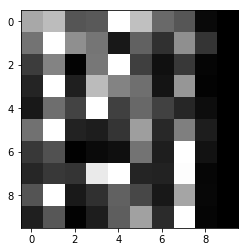

In [57]:
plt.imshow(attention_normalized, 'gray')

In [58]:
random_sequence

tensor([[7, 8, 0, 4, 5, 3, 1, 9, 2, 6]])

---

## Content based attention - concatenation

In [59]:
import content_based_concat_attention as attn_concat

In [60]:
accuracy_before = []
for _ in range(100):
    accuracy_before.append(attn_concat.test()[-2].item())
    
np.mean(accuracy_before)

0.97

In [61]:
for _ in range(3):
    attn_concat.train()

Loss at iteration 0: 2.30491900
Accuracy in last 100 iterations: 1/10
Loss at iteration 100: 2.28978395
Accuracy in last 100 iterations: 113/1000
Loss at iteration 200: 2.30278301
Accuracy in last 100 iterations: 126/1000
Loss at iteration 300: 2.35006380
Accuracy in last 100 iterations: 156/1000
Loss at iteration 400: 2.24085283
Accuracy in last 100 iterations: 185/1000
Loss at iteration 500: 1.91915226
Accuracy in last 100 iterations: 208/1000
Loss at iteration 600: 2.21466279
Accuracy in last 100 iterations: 219/1000
Loss at iteration 700: 2.01521349
Accuracy in last 100 iterations: 251/1000
Loss at iteration 800: 2.09983015
Accuracy in last 100 iterations: 244/1000
Loss at iteration 900: 2.11935568
Accuracy in last 100 iterations: 247/1000
Loss at iteration 1000: 2.04693079
Accuracy in last 100 iterations: 259/1000
Loss at iteration 1100: 1.94330001
Accuracy in last 100 iterations: 268/1000
Loss at iteration 1200: 1.87062323
Accuracy in last 100 iterations: 313/1000
Loss at iterati

Loss at iteration 700: 0.77074766
Accuracy in last 100 iterations: 775/1000
Loss at iteration 800: 0.50222474
Accuracy in last 100 iterations: 794/1000
Loss at iteration 900: 0.60948765
Accuracy in last 100 iterations: 817/1000
Loss at iteration 1000: 0.99139655
Accuracy in last 100 iterations: 778/1000
Loss at iteration 1100: 0.96068174
Accuracy in last 100 iterations: 788/1000
Loss at iteration 1200: 0.33649811
Accuracy in last 100 iterations: 794/1000
Loss at iteration 1300: 0.38193366
Accuracy in last 100 iterations: 822/1000
Loss at iteration 1400: 0.49591899
Accuracy in last 100 iterations: 783/1000
Loss at iteration 1500: 0.61563414
Accuracy in last 100 iterations: 813/1000
Loss at iteration 1600: 0.31038985
Accuracy in last 100 iterations: 813/1000
Loss at iteration 1700: 0.31561655
Accuracy in last 100 iterations: 822/1000
Loss at iteration 1800: 0.39372167
Accuracy in last 100 iterations: 833/1000
Loss at iteration 1900: 0.55202359
Accuracy in last 100 iterations: 809/1000
Lo

Loss at iteration 1400: 0.93679249
Accuracy in last 100 iterations: 923/1000
Loss at iteration 1500: 0.50631601
Accuracy in last 100 iterations: 901/1000
Loss at iteration 1600: 0.15184522
Accuracy in last 100 iterations: 898/1000
Loss at iteration 1700: 0.16795869
Accuracy in last 100 iterations: 905/1000
Loss at iteration 1800: 0.35315418
Accuracy in last 100 iterations: 913/1000
Loss at iteration 1900: 0.08675241
Accuracy in last 100 iterations: 911/1000
Loss at iteration 2000: 0.25390124
Accuracy in last 100 iterations: 921/1000
Loss at iteration 2100: 0.25954843
Accuracy in last 100 iterations: 916/1000
Loss at iteration 2200: 0.13572201
Accuracy in last 100 iterations: 919/1000
Loss at iteration 2300: 0.25778443
Accuracy in last 100 iterations: 908/1000
Loss at iteration 2400: 0.17485651
Accuracy in last 100 iterations: 932/1000
Loss at iteration 2500: 0.31829682
Accuracy in last 100 iterations: 913/1000
Loss at iteration 2600: 0.11687322
Accuracy in last 100 iterations: 924/1000

In [62]:
accuracy_after = []
for _ in range(1000):
    accuracy_after.append(attn_concat.test()[-2].item())
    
np.mean(accuracy_after)

9.375

In [63]:
random_sequence, correct_sequence, softmax_input, accurate, attentions = attn_concat.test()

In [64]:
softmax_input.max(1)[1], correct_sequence, accurate

(tensor([4, 2, 7, 6, 2, 3, 5, 0, 9, 8]),
 tensor([4, 2, 7, 6, 1, 3, 5, 0, 9, 8]),
 tensor(9))

In [65]:
def min_max_normalization(x):
    return (x - x.min())/(x.max() - x.min())

np.array([min_max_normalization(a[0,0].detach().numpy()) for a in attentions])

attention_normalized = np.array([min_max_normalization(a[0,0].detach().numpy()) for a in attentions])

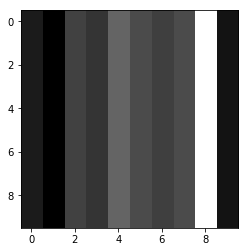

In [66]:
plt.imshow(attention_normalized, 'gray')

In [67]:
random_sequence

tensor([[7, 4, 1, 5, 0, 6, 3, 2, 9, 8]])